# Example Physics Cuts

In [1]:
import ROOT

In [2]:
hist_bc = ROOT.TH2D("Hist_bc", "chi2 vs theta before cut", 500, 0., 0.24, 500, 0., 20.)
hist_ac = ROOT.TH2D("Hist_ac", "chi2 vs theta after cut", 500, 0., 0.18, 500, 0., 2.)
hist_eloss = ROOT.TH2D("hist", "zv vs eloss", 500, 0., 30, 500, 0., 120.)
c = ROOT.TCanvas("c", "c", 700, 900)
c2 = ROOT.TCanvas()
c.Divide(0,3)

In [3]:
myfile = ROOT.TFile('../DATA/experiment.root')
mychain = ROOT.gDirectory.Get('tree1')
entries = mychain.GetEntriesFast()

In [4]:
for jentry in range(entries):
    nb = mychain.GetEntry(jentry)
    if nb <= 0:
        continue

    pt = ROOT.TMath.Sqrt(mychain.px**2 + mychain.py**2)
    theta = ROOT.TMath.ATan2(pt, mychain.pz)

    chi2 = mychain.chi2

    hist_bc.Fill(theta, chi2)

    if (chi2 < 1.5 and theta < 0.15):
        hist_ac.Fill(theta, chi2)


    emean = ROOT.TMath.Sqrt(mychain.px**2 + mychain.py**2 + mychain.pz**2)
    eloss = mychain.ebeam - emean

    hist_eloss.Fill(eloss, mychain.zv)


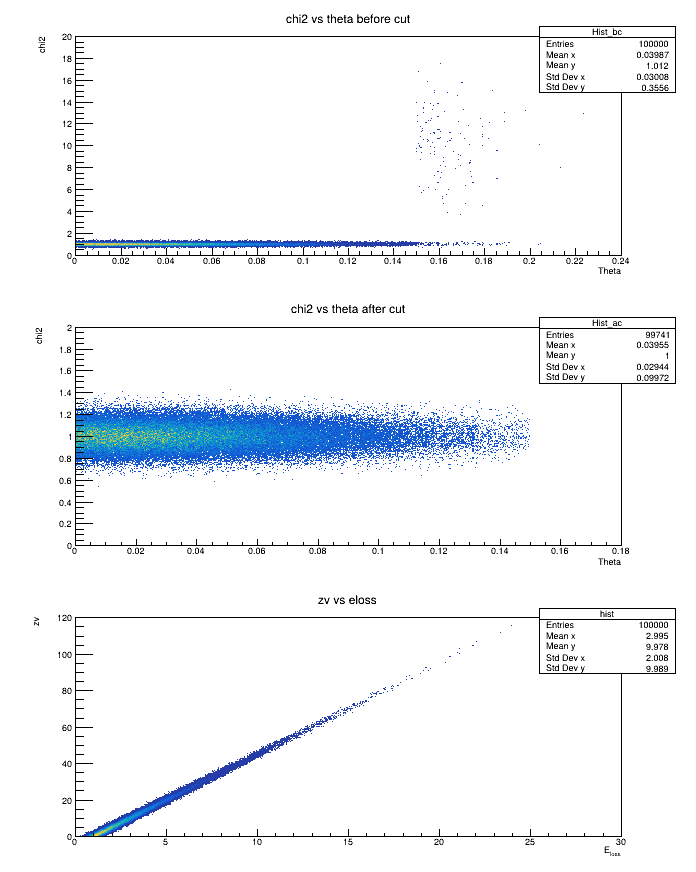

In [5]:
c.cd(1)
hist_bc.Draw();
hist_bc.GetXaxis().SetTitle("Theta")
hist_bc.GetYaxis().SetTitle("chi2")
c.cd(2)
hist_ac.Draw();
hist_ac.GetXaxis().SetTitle("Theta")
hist_ac.GetYaxis().SetTitle("chi2")
c.cd(3)
hist_eloss.Draw();
hist_eloss.GetXaxis().SetTitle("E_{loss}")
hist_eloss.GetYaxis().SetTitle("zv")
hist_eloss.Draw();

c.Draw()